##### INF8460 ‚Äì Traitement automatique de la langue naturelle - Automne 2024

## TP3: G√©n√©ration automatique de mots-cl√©s (concepts) avec une architecture Transformer


## Identification de l'√©quipe:

### Groupe de laboratoire: G01_B1

### Equipe num√©ro : Eq01

### Membres:

- Zo√© Paradis 2008732 (33% de contribution. nature de la contribution : Elle a r√©alis√© tous les excercice du tp individuellement comme chaque co√©quipi√®re. Puis les codes r√©alis√© ont √©t√© compar√© avec les autres membres pour valider les r√©ponses obtenues. Finalement, une version propre du tp a √©t√© r√©alise√© ensemble en combinant le code de tous les co√©quipi√®res.)
- Mahacine Ettahri 2312965 (33% de contribution. nature de la contribution : Elle a r√©alis√© tous les excercice du tp individuellement comme chaque co√©quipi√®re. Puis les codes r√©alis√© ont √©t√© compar√© avec les autres membres pour valider les r√©ponses obtenues. Finalement, une version propre du tp a √©t√© r√©alise√© ensemble en combinant le code de tous les co√©quipi√®res.)
- Xuewei Li 1879356 (33% de contribution, nature de la contribution : Elle a r√©alis√© tous les excercice du tp individuellement comme chaque co√©quipi√®re. Puis les codes r√©alis√© ont √©t√© compar√© avec les autres membres pour valider les r√©ponses obtenues. Finalement, une version propre du tp a √©t√© r√©alise√© ensemble en combinant le code de tous les co√©quipi√®res.)

* nature de la contribution: D√©crivez bri√®vement ce qui a √©t√© fait par chaque membre de l‚Äô√©quipe. Tous les membres sont cens√©s contribuer au d√©veloppement. Bien que chaque membre puisse effectuer diff√©rentes t√¢ches, vous devez vous efforcer d‚Äôobtenir une r√©partition √©gale du travail. Soyez pr√©cis ! N'indiquez pas seulement : travail r√©parti √©quitablement

## 1. Objectif du TP

Dans ce TP, vous allez devoir impl√©menter en `PyTorch` un mod√®le suivant l'architecture Transformer cr√©√©e initialement dans l'article "[Attention Is All You Need](https://arxiv.org/pdf/1706.03762)".
<br>
Votre t√¢che sera d'impl√©menter l'architecture du Transformer et d'entra√Æner un mod√®le de type Transformer √† g√©n√©rer les concepts cl√©s d'une phrase. Votre mod√®le prendra donc en entr√©e une phrase quelconque en anglais et produira en sortie une s√©quence de mots correspondant aux concepts les plus importants de la phrase. Par exemple :
<br>

**Entr√©e** : "The dog jumped over the fence." <br>
**Sortie attendue** : ['dog' 'jump' 'fence']

Cette t√¢che a d'ailleurs plusieurs applications dans le monde r√©el allant de la g√©n√©ration de r√©sum√©s jusqu'√† la cr√©ation de bases de connaissances √† partir d'un texte.


#### Requis et ressources utiles

Il est fortement conseill√© de s'√™tre familiaris√© avec la librairie `PyTorch` avant d'entamer le TP. Par exemple, vous devriez savoir comment fonctionne un objet de type `nn.Module` et ce que la fonction `forward` de cet objet fait. Plusieurs tutoriels sont disponibles sur internet expliquant clairement le fonctionnement de la librairie. Voici certaines ressources qui peuvent √™tre utiles :
- [Build The Neural Network](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)
- [PyTorch Tutorial](https://github.com/yunjey/pytorch-tutorial?tab=readme-ov-file)


## 2. Jeu de donn√©es

Le jeu de donn√©es est compos√© de paires (phrase, concepts) o√π une phrase est mentionn√©e et la liste des concepts les plus importants de la phrase est indiqu√©e. Le jeu de donn√©es est divis√© en ensembles d'entra√Ænement, de validation et de test :
- Entra√Ænement : 4500 examples (train.csv)
- Validation : 500 examples (val.csv)
- Test : 500 examples (test.csv)

Pour une m√™me s√©quence de concepts, il y a 3 phrases pouvant √™tre associ√©es √† ces concepts. Par exemple, pour les concepts : ['cat' 'laptop' 'lie'], les phrases suivantes y sont associ√©es :
- A cat lying on a laptop
- A large cat lies down next to a laptop.
- There is a cat lying on top of the laptop.


## 3. LIBRAIRIES PERMISES
- Jupyter notebook
- PyTorch
- nltk
- transformers
- pandas
- matplotlib
- numpy
- Huggingface


Pour toute autre librairie, demandez √† votre charg√© de laboratoire

## 4. INFRASTRUCTURE

- Vous avez acc√®s aux GPU du local L-4818. Dans ce cas, vous devez utiliser le dossier temp (voir le tutoriel VirtualEnv.pdf)

## 5. √âTAPES DU TP

In [51]:
# ! pip install tokenizers

In [52]:
# Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as O
from torch.utils.data import DataLoader

# ML
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import math
import numpy as np

# System
from dataclasses import dataclass
import time
import re

# Huggingface
from tokenizers import CharBPETokenizer

Il vous faudra peut-√™tre t√©l√©charger ce module de `nltk`

In [53]:
# nltk.download('punkt')

### 1. Charger les donn√©es (2 points)

La premi√®re √©tape va √™tre de charger les donn√©es des fichiers d'entra√Ænement et d'√©valuation. Pour cela, nous allons utiliser la classe `Dataset` de `PyTorch`. Compl√©tez les fonctions de cette classe.

In [54]:
class CustomDataset(torch.utils.data.Dataset):

    def __init__(self, file_path: str = None, data: pd.DataFrame = None):

        if file_path is None and data is None:
            raise Exception('A file path or a dataframe must be passed to create a CustomDataset')

        if file_path != None:
            self.data = pd.read_csv(file_path)
        else:
            self.data = data.copy()

        # TODO : Enlever les donn√©es qui sont nulles et
        # assigner le r√©sultat dans la variable data
        self.data = self.data.dropna()
        # END TODO

    def __len__(self):
        # TODO : Retourne le nombre de donn√©es
        return len(self.data)
        # END TODO

    def __getitem__(self, idx: int):
        # TODO : Retourne l'√©l√©ment √† l'index "idx"
        return self.data.iloc[idx]
        # END TODO

    def get_column(self, column: str):
        # TODO : Retourne toutes les rang√©es de la colonne "column"
        return self.data[column]
        # END TODO

    def get_batch(self, idx: int, size):
        # TODO : Retourne toutes les rang√©es de l'index "idx" √† "idx" + "size"
        return self.data.iloc[idx:idx+size]
        # END TODO

    def transform(self, function):
        self.data = self.data.apply(function)

    def sample(self, nb_samples, random_state=42):
        return self.data.sample(n=nb_samples, random_state=random_state)

In [55]:
root = 'data/'

train_dataset = CustomDataset(root + 'train.csv')
test_dataset = CustomDataset(root + 'test.csv')
val_dataset = CustomDataset(root + 'val.csv')

INPUT_COLUMN = 'sentence'
OUTPUT_COLUMN = 'concepts'
MAX_LENGTH = 16
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu' # Vous pouvez changer sur quelle machine les calculs seront effectu√©s
DEVICE = 'cpu'

In [56]:
print('Training set size : ', len(train_dataset))
print('Validation set size : ', len(val_dataset))
print('Testing set size : ', len(test_dataset))

Training set size :  4500
Validation set size :  500
Testing set size :  500


### 2. Statistiques (5 points)

Avant d'entamer la cr√©ation du mod√®le, il est important de se familiariser avec les donn√©es et d'√©valuer la taille des donn√©es avec lesquelles nous travaillons.

#### 2.1 Histogramme du nombre de caract√®res (2 points)

Compl√©tez la m√©thode `show_histogram_nb_characters` qui affiche un histogramme de la distribution du nombre de caract√®res des exemples de la colonne pass√©e en param√®tre. L'axe des abscisses devra repr√©senter le nombre de caract√®res et l'axe des ordonn√©es le nombre de documents. Utilisez des bacs (bins) de 20 pour l'histogramme. Affichez ensuite la distribution du nombre de caract√®res sur l'ensemble d'entra√Ænement pour la colonne 'sentence' et la colonne 'concepts'.

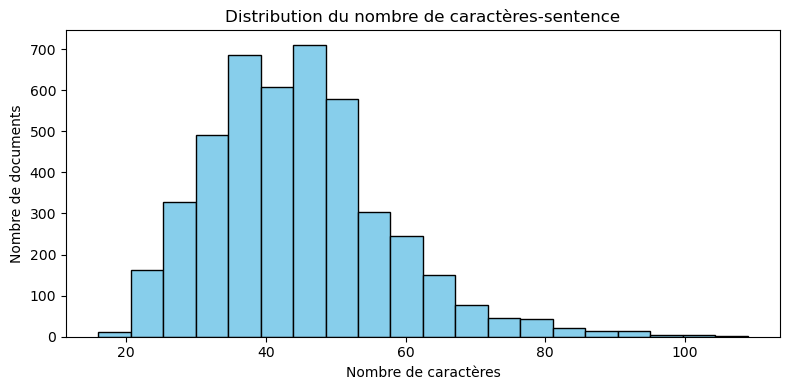

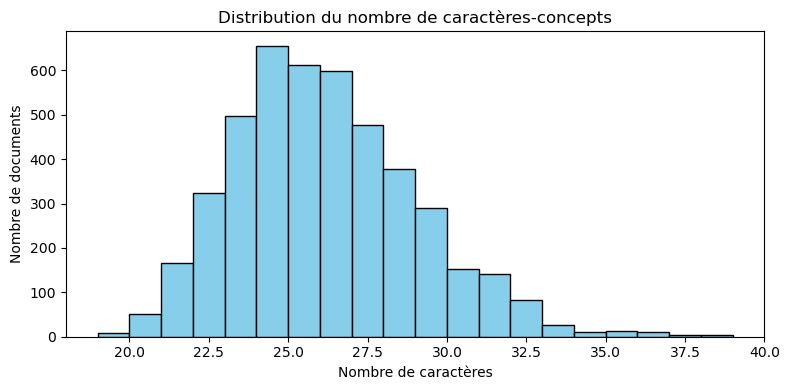

In [57]:
def show_histogram_nb_chararacters(dataset: CustomDataset, column: str):

    """
    Affiche la distribution de la colonne pass√© en param√®tre. L'histogramme doit contenir un titre et des titres sur les axes

    dataset: Dataset contenant plusieurs colonne dont la colonne dont les statistiques doivent √™tre affich√©es
    column: Colonne √† afficher

    """
    # TODO
    # On calcule le nombre des caract√®res pour la colonne pass√©e en param√®tre
    count = dataset.get_column(column).apply(lambda x: len(x))

    plt.figure(figsize=(8, 4))
    plt.hist(count, bins=20, color='skyblue', edgecolor='black')  
    plt.ylabel('Nombre de documents')
    plt.xlabel('Nombre de caract√®res')
    plt.title(f'Distribution du nombre de caract√®res-{column}')
    plt.tight_layout()
    # END TODO

show_histogram_nb_chararacters(train_dataset, INPUT_COLUMN)
show_histogram_nb_chararacters(train_dataset, OUTPUT_COLUMN)

#### 2.2 Histogramme du nombre de mots par document (2 points)

De la m√™me mani√®re, compl√©tez la m√©thode `show_histogram_nb_words` qui affiche un histogramme de la distribution du nombre de mots des exemples de la colonne pass√©e en param√®tre. Utilisez des bacs (bins) de 20 pour l'histogramme. Affichez ensuite la distribution du nombre de mots sur l'ensemble d'entra√Ænement pour les colonnes "sentence" et "concepts". Dans le cas de la colonne 'concepts', assurez-vous que les '[', ']' et les apostrophes ne soient pas consid√©r√©es comme des mots.

Indice : Utilisez la m√©thode word_tokenize() de nltk.

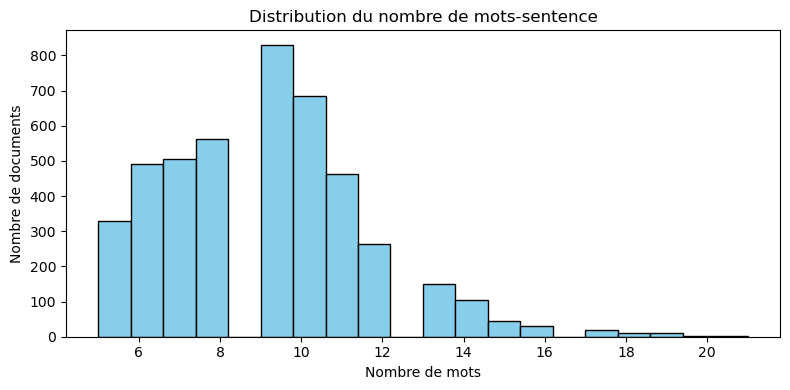

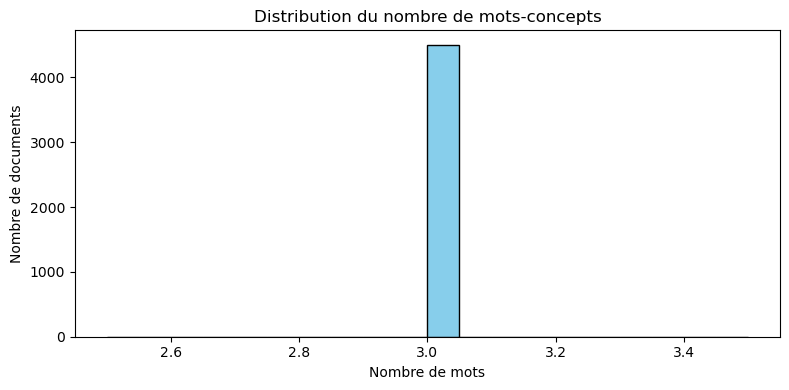

In [58]:
def show_histogram_nb_words(dataset: CustomDataset, column: str):

    """
    Affiche la distribution de la colonne pass√© en param√®tre du dataset. L'histogramme doit contenir un titre et des titres sur les axes

    dataset: Dataset contenant plusieurs colonne dont la colonne dont les statistiques doivent √™tre affich√©es
    column: Colonne √† afficher

    """
    # TODO
    # On calcule le nombre des mots pour la colonne pass√©e en param√®tre
    count = dataset.get_column(column).apply(lambda x: \
            len(nltk.tokenize.word_tokenize(\
                x.replace("[", "").replace("]", "").replace("'", ""))))
    
    plt.figure(figsize=(8, 4))
    plt.hist(count, bins=20, color='skyblue', edgecolor='black')  
    plt.ylabel('Nombre de documents')
    plt.xlabel('Nombre de mots')
    plt.title(f'Distribution du nombre de mots-{column}')
    plt.tight_layout()
    # END TODO

show_histogram_nb_words(train_dataset, INPUT_COLUMN)
show_histogram_nb_words(train_dataset, OUTPUT_COLUMN)

#### 2.3 Commentez les graphiques (1 points)
1. Est-ce que les distributions suivent des distributions normales ?
2. Qu'observez-vous de sp√©cial sur la distribution du nombre de mots de la colonne "concepts" ? Pourquoi est-elle ainsi ?

## Analyse

### 3. Segmentation (Tokenization) (5 points)

#### 3.1 Entra√Ænement du segmenteur (tokenizer) (3 points)
La fonction `word_tokenize()` de `nltk` est utile pour rapidement ressortir des statistiques, mais elle reste tr√®s g√©n√©rale et inefficace. Afin de r√©duire le plus possible la taille du vocabulaire, nous allons entra√Æner notre propre Tokenizer en nous basant sur l'algorithme BPE (Byte Pair Encoding). L'algorithme BPE est une m√©thode de compression de texte qui permet de cr√©er des tokenizers efficaces en regroupant les caract√®res les plus fr√©quents. Il commence par diviser le texte en caract√®res uniques, puis it√©rativement fusionne les paires de caract√®res les plus fr√©quentes en nouveaux symboles. Ce processus continue jusqu'√† atteindre un nombre pr√©d√©fini de jetons (tokens), permettant ainsi de g√©rer des vocabulaires de diff√©rentes tailles de mani√®re flexible et efficace. √Ä l'aide de BPE, nous allons transformer les mots en nombres pour pouvoir les passer au Transformer par la suite. Chaque jeton (token) sera associ√© √† un nombre correspondant √† l'indice du jeton dans le vocabulaire. Une s√©quence en entr√©e sera ainsi repr√©sent√©e comme une s√©quence de nombres.

De plus, des jetons sp√©ciaux seront ajout√©s au tokenizer pour sp√©cifier le d√©but d'une phrase (begin-of-sequence : `[BOS]`) et la fin d'une phrase (end-of-sequence : `[EOS]`). Un jeton de padding `[PAD]` sera utilis√© afin de s'assurer que toutes les phrases ont la m√™me taille. Finalement, un jeton `[UNK]` sera utilis√© pour les jetons inconnus.

Pour cr√©er ce vocabulaire √† l'aide de l'algorithme BPE, il faudra entra√Æner le tokenizer sur notre ensemble d'entra√Ænement pour qu'il puisse encoder efficacement les mots qui y sont pr√©sents. L'entra√Ænement est d√©j√† impl√©ment√© par la classe `ByteLevelBPYTokenizer` de la librairie `tokenizers`.

Vous n'avez qu'√† compl√©ter la fonction :
- `data_generator` qui retourne un g√©n√©rateur d'un lot (batch) de texte provenant de l'ensemble d'entra√Ænement. Pour chaque lot, les colonnes "sentence" et "concepts" sont concat√©n√©es pour former la cha√Æne finale qui sera envoy√©e au tokenizer. Les lots sont utiles lors de l'entra√Ænement pour acc√©l√©rer l'entra√Ænement en parall√©lisant le tout et en √©vitant de charger tout notre ensemble d'entra√Ænement en m√©moire directement.

In [59]:
VOCAB_SIZE = 8000
special_tokens = ['[PAD]', '[BOS]', '[EOS]', '[UNK]']
base_tokenizer = CharBPETokenizer(unk_token=special_tokens[-1])
tokenizer_batch_size = 64

def data_generator():
    """
    Generateur qui retourne un lot (batch) de texte provenant de l'ensemble d'entra√Ænement.
    Pour chaque √©l√©ment d'un lot, les colonnes "target" et "concepts" sont concat√©n√©e.
    """
    for i in range(0, len(train_dataset), tokenizer_batch_size):
        # TODO
        batch = train_dataset.get_batch(i,tokenizer_batch_size)
        # On concat√®ne les colonnes "sentence" et "concepts" pour former la cha√Æne finale 
        text = batch.apply(lambda x: x['sentence'] +\
               ' ' + x['concepts'], axis=1).tolist() # Mettez le lot dans la variable text
        # END TODO
        yield text

Vous devez maintenant compl√©ter la fonction :
- `train_tokenizer` qui prend en param√®tre un tokenizer pour entra√Æner ce dernier √† l'aide de la fonction [train_from_iterator](https://github.com/huggingface/tokenizers/blob/main/bindings/python/py_src/tokenizers/implementations/byte_level_bpe.py). Le g√©n√©rateur de donn√©es (data_generator) est envoy√© √† la fonction train_from_iterator tout comme la taille du vocabulaire, les jetons sp√©ciaux et la fr√©quence minimum d'une s√©quence pour la consid√©rer comme un jeton. Indiquez explicitement une fr√©quence minimum de 2.

In [60]:
from tokenizers import AddedToken, Tokenizer, decoders, pre_tokenizers, processors, trainers

def train_tokenizer(tokenizer: CharBPETokenizer):
    """
    # Entra√Æne le tokenizer pass√© en param√®tre en appelant la fonction train_from_iterator
    # et en sp√©cifiant le g√©n√©rateur de donn√©e (data_generator), la taille du vocabulaire,
    # les jetons sp√©ciaux et une fr√©quence minimum de 2 (indiquez le explicitement)
    # """
    # TODO
    tokenizer.train_from_iterator(
        iterator = data_generator(),
        vocab_size = VOCAB_SIZE,
        min_frequency = 2,
        special_tokens = special_tokens,
    )
    # END TODO


train_tokenizer(base_tokenizer)

# On ajoute les jetons de d√©but, de fin de phrase et de jeton inconnu
bos_token_id = base_tokenizer.token_to_id("[BOS]")
eos_token_id = base_tokenizer.token_to_id("[EOS]")
unk_token_id = base_tokenizer.token_to_id("[UNK]")

# On applique un template au tokenizer pour qu'il ajoute
# les jetons au d√©but et √† la fin de chaque phrase
base_tokenizer.post_processor = processors.TemplateProcessing(
    single=f"[BOS]:0 $A:0 [EOS]:0",
    special_tokens=[
        ("[BOS]", bos_token_id),
        ("[EOS]", eos_token_id),
    ],
)

Nous allons maintenant transformer notre tokenizer pour qu'il soit compatible avec l'API de la librairie Huggingface. Cela permettra entre autre de faciliter les appels de m√©thodes pour modifier facilement nos entr√©es. Par exemple, avec l'API de Huggingface, nous pouvons simplement appeler la m√©thode `tokenize` pour diviser une s√©quence en jetons (`Welcome` -> `[W, el, come]`). De la m√™me mani√®re, l'API nous permet d'appeler les m√©thodes `encode` et `decode` pour transformer une cha√Æne de caract√®res en s√©quences d'indices de jetons (`Welcome` -> `[36, 170, 664]`) et inversement.

In [61]:
from transformers import PreTrainedTokenizerFast

tokenizer = PreTrainedTokenizerFast(tokenizer_object=base_tokenizer._tokenizer, truncation=True)
tokenizer.add_special_tokens({
    'pad_token': "[PAD]",
    'bos_token': "[BOS]",
    'eos_token': "[EOS]",
    'unk_token': "[UNK]"
});

Testons maintenant notre tokenizer sur une phrase de test

In [62]:
test_input = 'Welcome ! The boat arrived at the station ! ü§ó '
print(test_input, '\n')
print(tokenizer.tokenize(test_input))

Welcome ! The boat arrived at the station ! ü§ó  

['W', 'el', 'come</w>', '!</w>', 'The</w>', 'boat</w>', 'arrived</w>', 'at</w>', 'the</w>', 'station</w>', '!</w>', '[UNK]']


Observons maintenant la m√™me phrase, mais une fois encod√©e en nombre. D√©codons-la ensuite √† partir de sa version encod√©e pour voir si nous retrouvons la phrase initiale.

- La m√©thode `encode` permet de transformer une s√©quence de mots en s√©quence de nombres correspondant aux indices des diff√©rents jetons de la phrase dans le vocabulaire
- La m√©thode `decode` permet de transformer une s√©quence d'indices de jetons en phrase lisible.

In [63]:
print('Texte initial : ', test_input)
print('=' * 100)
print('Texte encod√© : ', tokenizer.encode(test_input))
print('Texte d√©cod√© : ', tokenizer.decode(tokenizer.encode(test_input)))

Texte initial :  Welcome ! The boat arrived at the station ! ü§ó 
Texte encod√© :  [1, 36, 170, 664, 98, 277, 274, 2907, 126, 118, 254, 98, 3, 2]
Texte d√©cod√© :  [BOS]Welcome ! The boat arrived at the station ! [UNK][EOS]


#### 3.2 Que remarquez-vous dans la version segment√©e (tokenized) de la phrase de test ? Quelles sont les diff√©rences entre la phrase initiale et la phrase d√©cod√©e ? Pourquoi ? (2 points)

### 4. Transformer (28 points)

Il est maintenant le temps de construire les couches du Transformer. Son architecture globale est pr√©sent√©e dans la figure suivante. :

![Transformer](images/transformer.png)

Les couches sont d√©finies pour vous et vous n'avez qu'√† compl√©ter, √† moins d'indication contraire, la fonction `forward` de chacune des classes qui prend un tenseur en entr√©e et effectue une transformation sur celui-ci pour g√©n√©rer une sortie. Cette transformation varie en fonction de chaque classe. Une description de ce que doit faire la classe est indiqu√©e √† chaque √©tape. Lorsque la fonction `forward` est complexe, une figure est fournie pour vous guider. Attention, ne changez pas le constructeur ou le nom de la classe !

#### 4.1 Positional Embedding
Le Transformer encode l'information de l'ordre des mots dans les plongements des mots. Des plongements de position sont calcul√©s et ils sont ajout√©s aux plongements de contexte. Dans ce cas-ci la classe `PositionalEmbedding` vous est donn√©e.

In [64]:
class PositionalEmbedding(nn.Module):
    """
    Cette classe a √©t√© prise de l'impl√©mentation originale du papier 'Attention Is All You Need'
    """

    def __init__(self, max_seq_length, embedding_dim):
        super(PositionalEmbedding, self).__init__()

        self.max_seq_length = max_seq_length
        self.embedding_dim = embedding_dim

        pe = torch.zeros(max_seq_length, self.embedding_dim)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, self.embedding_dim, 2).float() * -(math.log(10000.0) / self.embedding_dim))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x: torch.Tensor):
        return x + self.pe[:, :x.size(1)]

#### 4.2 Attention (6 points)
Le m√©canisme d'attention est le coeur de l'architecture du Transformer. Il permet notamment la parall√©lisation de l'entra√Ænement tout en garantissant un lien direct entre tous les jetons. Vous devrez impl√©menter la fonction `scaled_dot_product_attention` qui effectue le calcul principal derri√®re le m√©canisme d'attention. Cette fonction prend en entr√©e les tenseurs `Q`, `K`, `V` et effectue le calcul suivant :
$$A = \texttt{softmax}\Big( \frac{Q K^T \odot M}{\texttt{head\_dim}} \Big) V$$
o√π $M$ est le masque d'attention qui doit √™tre appliqu√©. Plus de d√©tails sont indiqu√©s dans la description de la fonction √† propos du masque. Par rapport au tenseur de cl√©s, vous remarquerez dans la formule qu'une transpos√©e est appliqu√©e sur ce tenseur. √âtant donn√© qu'un tenseur poss√®de plus que 2 dimensions, il est important de sp√©cifier quelles dimensions seront transpos√©es dans le tenseur. Dans notre cas, il s'agit des dimensions correspondants aux jetons de la s√©quence et aux plongements des jetons

In [65]:
class MultiHeadAttention(nn.Module):
    def __init__(self, model_dim, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert model_dim % num_heads == 0, "La dimension du mod√®le doit √™tre divisible par le nombre de t√™tes d'attention"

        self.model_dim = model_dim
        self.num_heads = num_heads
        self.head_dim = model_dim // num_heads

        self.wq = nn.Linear(model_dim, model_dim) # Query
        self.wk = nn.Linear(model_dim, model_dim) # Key
        self.wv = nn.Linear(model_dim, model_dim) # Value
        self.wo = nn.Linear(model_dim, model_dim) # Output

        self.mask_value = -1e9

    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        """
        Calcule les plongements d'attention en utilisant la formule

        attn = softmax(Q * K^T @ mask / head_dim) * V

        Args :
            Q : plongements des queries
            Taille : [batch_size, num_heads, seq_length, head_dim]

            K : plongements des keys
            Taille : [batch_size, num_heads, seq_length, head_dim]

            V : plongement des values
            Taille : [batch_size, num_heads, seq_length, head_dim]

            mask : Masque d'attention qui doit √™tre appliqu√© avant le softmax pour que
            les jetons ne portent pas leur attention sur certains jetons. Le masque est
            notamment utilis√© dans le d√©codeur pour s'assurer que le transformer n'ait
            pas acc√®s aux futurs jetons lorsqu'il essaie de pr√©dire le prochain jeton.
            Il contient des valeurs 0 ou 1. Une valeur de 0 √† la position i,j indique
            que pour le jeton i, le jeton j doit √™tre masqu√©. Pour masquer la valeur,
            il suffit de mettre une valeur tr√®s petite (self.mask_value) √† l'indice i,j.
            La fonction masked_fill de PyTorch pourrait √™tre utile
            Taille : [1, seq_length, seq_length]

        Returns :
        R√©sultat du calcul d'attention de taille [batch_size, num_heads, seq_length, head_dim]
        """
        # TODO
        d_k = Q.size(-1)
        dot_product = torch.matmul(Q, K.transpose(-2, -1))\
            / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))

        if mask is not None:
            dot_product = dot_product.masked_fill(mask == 0, self.mask_value)

        attention = torch.matmul(F.softmax(dot_product, dim=-1), V)

        return attention
        # END TODO

    def split_heads(self, x):
        """
        S√©pare une entr√©e sur plusieurs t√™tes d'attention

        Args :
            x : Tenseur d'entr√©e
            Taille : [batch_size, seq_length, model_dim]

        Returns :
        Tenseur s√©par√© sur plusieurs t√™tes d'attention
        Taille : [batch_size, num_heads, seq_length, head_dim]
        """
        return x.view(x.shape[0], x.shape[1], self.num_heads, self.head_dim).transpose(1, 2)

    def combine_heads(self, x):
        """
        Combine une entr√©e √† travers les t√™tes d'attention

        Args :
            x : Tenseur d'entr√©e
            Taille : [batch_size, num_heads, seq_length, head_dim]

        Returns :
        Tenseur s√©par√© sur plusieurs t√™tes d'attention
        Taille : [batch_size, seq_length, model_dim]
        """
        return x.transpose(1, 2).contiguous().view(x.shape[0], x.shape[2], self.model_dim)

    def forward(self, queries, keys, values, mask=None):
        """
        Ex√©cute le m√©canisme d'attention √† travers plusieurs t√™tes
        d'attention

        Args :
            queries : plongements des queries
            Taille : [batch_size, seq_length, model_dim]

            keys : plongements des keys
            Taille : [batch_size, seq_length, model_dim]

            values : plongement des values
            Taille : [batch_size, seq_length, model_dim]

            mask : mask qui sera appliqu√©
            Taille : [1, seq_length, seq_length]

        Returns :
        Tenseur contenant les plongements finaux de chaque indice de
        la s√©quence
        Taille : [batch_size, seq_length, model_dim]
        """
        Q = self.split_heads(self.wq(queries))
        K = self.split_heads(self.wk(keys))
        V = self.split_heads(self.wv(values))
        
        attn_output = self.scaled_dot_product_attention(Q, K, V, mask)
        return self.wo(self.combine_heads(attn_output))

In [66]:
def test_attention():
    batch_size = 1
    seq_length = 4
    model_dim = 6
    num_heads = 2

    torch.random.manual_seed(42)
    attention = MultiHeadAttention(model_dim=model_dim, num_heads=num_heads)
    inputs = torch.randint(0, 10, (batch_size, seq_length, model_dim), dtype=torch.float32)
    mask = (1 - torch.triu(torch.ones(1, seq_length, seq_length), diagonal=1))
    print(attention(inputs, inputs, inputs, mask=mask).detach())

test_attention()

tensor([[[-0.6789,  2.8487,  2.8666, -1.1983,  3.2915,  0.5359],
         [-0.3437,  3.1045,  3.0715, -1.1405,  3.2748,  0.3843],
         [-2.5825,  4.2728, -0.0114, -2.2663, -0.0922, -2.4731],
         [-2.5749,  4.2706, -0.0056, -2.2613, -0.0874, -2.4694]]])


Sortie attendue :
```
tensor([[[-0.6789,  2.8487,  2.8666, -1.1983,  3.2915,  0.5359],
         [-0.3437,  3.1045,  3.0715, -1.1405,  3.2748,  0.3843],
         [-2.5825,  4.2728, -0.0114, -2.2663, -0.0922, -2.4731],
         [-2.5749,  4.2706, -0.0056, -2.2613, -0.0874, -2.4694]]])
```

#### 4.3 Encodeur (6 points)
L'encodeur du Transformer encode la s√©quence d'entr√©e dans des vecteurs de contexte avant d'envoyer ces vecteurs de contexte au d√©codeur pour qu'ils puissent √™tre utilis√©s pour g√©n√©rer la s√©quence de sortie. Vous n'avez qu'√† compl√©ter les fonctions `forward` des classes `TransformerFeedForward`, `EncoderLayer` et `Encoder`. L'architecture d'une couche d'encodeur `EncoderLayer` est d√©crite dans la figure suivante :

![EncoderLayer](images/encoder_layer.png)

La classe `TransformerFeedForward` repr√©sente une couche simple de r√©seaux de neurones avec la fonction d'activation `ReLU` qui sera pr√©sente dans l'encodeur. Son architecture est d√©crite dans la figure suivante :

![TransformerFeedForward](images/transformer_feed_forward.png)

In [67]:
class TransformerFeedForward(nn.Module):

    def __init__(self, model_dim: int, ff_dim: int) -> None:
        super(TransformerFeedForward, self).__init__()
        
        self.model_dim = model_dim
        self.ff_dim = ff_dim

        self.ff1 = nn.Linear(model_dim, ff_dim)
        self.ff2 = nn.Linear(ff_dim, model_dim)

    def forward(self, x: torch.Tensor):
        """
        Applique les deux couches lin√©aires (ff) cons√©cutivement avec la fonction
        d'activation ReLU apr√®s chaque couche lin√©aire

        Args :
            x : Tenseur d'entr√©e de taille [batch_size, model_dim]

        Returns :
        Tenseur apr√®s √™tre pass√© √† travers les couches lin√©aires de taille
        [batch_size, model_dim]
        """
        # TODO
        self.relu = nn.ReLU()
        x = self.relu(self.ff1(x))
        x = self.relu(self.ff2(x))
        return x
        # END TODO

La classe `EncoderLayer` repr√©sente une seule couche qui applique le m√©canisme d'attention sur la sortie de la couche pr√©c√©dente. Dans le cas de la premi√®re couche d'encodeur, il s'agit simplement de la couche de plongements des jetons. Par la suite, le r√©sultat du m√©canisme d'attention est normalis√© et envoy√© √† une couche de r√©seau de neurones.

In [68]:
class EncoderLayer(nn.Module):

    def __init__(self, model_dim: int, ff_dim: int, dropout_rate: int = 0.3, num_heads=8) -> None:
        super(EncoderLayer, self).__init__()

        self.self_attention = MultiHeadAttention(model_dim=model_dim, num_heads=num_heads)
        self.feed_forward = TransformerFeedForward(model_dim=model_dim, ff_dim=ff_dim)
        self.attention_layer_norm = nn.LayerNorm(model_dim)
        self.ff_layer_norm = nn.LayerNorm(model_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x: torch.Tensor, encoder_mask: torch.Tensor = None):
        """
        Applique la couche d'attention, de normalisation et de r√©seau de neurones
        sur l'entr√©e

        Args :
            x : Tenseur d'entr√©e de l'encodeur correspondant √† la s√©quence d'entr√©e
            Taille : [batch_size, seq_length, model_dim]

        Returns :
        Tenseur apr√®s avoir appliqu√©s les couches de taille [batch_size, seq_length,
        model_dim]
        """
        # TODO
        # On applique l'attention et le r√©sultat est normalis√©
        attention_output = self.self_attention(x, x, x, mask=encoder_mask)
        attention_output = self.dropout(attention_output)
        output_1 = self.ff_layer_norm(x + attention_output)

        # On applique le feed-forward et le r√©sultat est normalis√©
        ffn_output = self.feed_forward(output_1)
        ffn_output = self.dropout(ffn_output)
        output_2 = self.ff_layer_norm(output_1 + ffn_output)

        return output_2
        # END TODO

La classe `Encoder` correspond √† une suite de plusieurs couches d'encodeurs. La fonction `forward` de cette classe doit appeler chacune des couches (`EncoderLayer`) une √† la suite de l'autre en passant √† la couche courante la sortie de la couche pr√©c√©dente. Le masque est partag√© entre toutes les couches `EncoderLayer`.

In [69]:
class Encoder(nn.Module):

    def __init__(self, num_layers: int, model_dim: int, ff_dim: int, dropout_rate: int = 0.3, num_heads=8) -> None:
        super(Encoder, self).__init__()

        self.layers = nn.ModuleList(
            [EncoderLayer(
                model_dim=model_dim,
                ff_dim=ff_dim,
                dropout_rate=dropout_rate,
                num_heads=num_heads,
            ) for _ in range(num_layers)]
        )

    def forward(self, x: torch.Tensor, encoder_mask: torch.LongTensor = None):
        """
        Applique toutes les couches d'encodeur cons√©cutivement

        Args :
            x : Tenseur d'entr√©e de l'encodeur correspondant √† la s√©quence d'entr√©e
            Taille : [batch_size, seq_length, model_dim]

            encoder_mask : Tenseur contenant le masque qui sera utilis√© par l'encodeur
            pour cacher certains jetons (notamment les jetons [PAD])
        Returns :
        Tenseur apr√®s avoir appliqu√©s les couches dans l'encodeur de taille
        [batch_size, seq_length, model_dim]
        """
        # TODO 
        for layer in self.layers:
            x = layer(x, encoder_mask)
        return x
        # END TODO

#### 4.4 D√©codeur (8 points)
Le d√©codeur est la partie du Transformer qui g√©n√®re la s√©quence de sortie en prenant le contexte de la s√©quence d'entr√©e et les jetons qui ont √©t√© g√©n√©r√©s pr√©c√©demment. De la m√™me mani√®re que l'encodeur, la classe `DecoderLayer` repr√©sente une seule couche de d√©codeur. L'architecture du `DecoderLayer` est pr√©sent√©e dans la figure suivante :

![DecoderLayer](images/decoder_layer.png)

In [70]:
class DecoderLayer(nn.Module):

    def __init__(self, model_dim: int, ff_dim: int, dropout_rate: int = 0.3, num_heads=8) -> None:
        super(DecoderLayer, self).__init__()

        self.self_attention = MultiHeadAttention(model_dim=model_dim, num_heads=num_heads)
        self.cross_attention = MultiHeadAttention(model_dim=model_dim, num_heads=num_heads)

        self.feed_forward = TransformerFeedForward(model_dim=model_dim, ff_dim=ff_dim)

        self.self_attention_layer_norm = nn.LayerNorm(model_dim)
        self.cross_attention_layer_norm = nn.LayerNorm(model_dim)
        self.ff_layer_norm = nn.LayerNorm(model_dim)

        self.dropout = nn.Dropout(dropout_rate)

    def forward(self,
                x: torch.Tensor,
                encoder_out: torch.Tensor,
                encoder_mask: torch.LongTensor = None,
                decoder_mask: torch.LongTensor = None):
        """
        Applique les couches d'attention, de normalisation et de r√©seau de neurones
        sur l'entr√©e

        Args :
            x : Entr√©e du d√©codeur correspondant √† la s√©quence de sortie d√©cal√©e vers
            la droite
            Taille : [batch_size, seq_length, model_dim]

            encoder_output : Sortie de l'encodeur utilis√© pour la couche de cross-
            attention
            Taille : [batch_size, seq_length, model_dim]

            encoder_mask : Masque qui cache certains jetons dans la s√©quence d'entr√©e.
            Par exemple, les jetons [PAD] seront cach√©s puisqu'ils ne sont utilis√©s que
            pour aggrandir les s√©quences jusqu'√† la fen√™tre de contexte du Transformer
            Taille : [batch_size, seq_length, seq_length]

            decoder_mask : Masque qui cache certains jetons dans la s√©quence de sortie.
            Ce masque est notamment utilis√© dans le d√©codeur pour s'assurer que le
            transformer n'ait pas acc√®s aux futurs jetons lorsqu'il essaie de pr√©dire
            le prochain jeton.
            Taille : [batch_size, seq_length, seq_length]
        """
        # TODO
        # On applique l'auto-attention et le r√©sultat est normalis√©
        self_attention_out = self.self_attention(x, x, x, mask=decoder_mask)
        self_attention_out = self.dropout(self_attention_out)
        x = self.self_attention_layer_norm(x + self_attention_out)

        # On applique l'attention crois√©e et le r√©sultat est normalis√©
        cross_attention_out = self.cross_attention(x, encoder_out, \
                                encoder_out, mask=encoder_mask)
        cross_attention_out = self.dropout(cross_attention_out)
        x = self.cross_attention_layer_norm(x + cross_attention_out)

        # On applique le feed-forward et le r√©sultat est normalis√©
        feed_forward_out = self.feed_forward(x)
        feed_forward_out = self.dropout(feed_forward_out)
        x = self.ff_layer_norm(x + feed_forward_out)
        return x
        # END TODO

La classe `Decoder` repr√©sente toutes les couches du d√©codeur. La fonction `forward` de cette classe doit appeler chacune des couches (`DecoderLayer`) une √† la suite de l'autre en passant √† la couche courante la sortie de la couche pr√©c√©dente. Les attributs `encoder_out`, `encoder_mask` et `decoder_mask` sont partag√©s entre toutes les couches `DecoderLayer`.

In [71]:
class Decoder(nn.Module):

    def __init__(self, num_layers: int, model_dim: int, ff_dim: int, dropout_rate: int = 0.3, num_heads=8) -> None:
        super(Decoder, self).__init__()

        self.layers = nn.ModuleList(
            [DecoderLayer(
                model_dim=model_dim,
                ff_dim=ff_dim,
                dropout_rate=dropout_rate,
                num_heads=num_heads,
            ) for _ in range(num_layers)]
        )

    def forward(self, x: torch.Tensor, encoder_out: torch.Tensor, encoder_mask: torch.LongTensor = None, decoder_mask: torch.LongTensor = None):
        """
        Applique toutes les couches du d√©codeur cons√©cutivement

        Args :
            x : Tenseur d'entr√©e du d√©codeur correspondant √† la s√©quence de sortie
            Taille : [batch_size, seq_length, model_dim]

            encoder_out : Tenseur contenant la s√©quence d'entr√©e encod√©e par l'encodeur

            encoder_mask : Tenseur contenant le masque qui sera utilis√© par l'encodeur
            pour cacher certains jetons (notamment les jetons [PAD])

            decoder_mask : Tenseur contenant le masque qui sera utilis√© par le d√©codeur
            pour cacher certains jetons (notamment les jetons [PAD] et les jetons futurs)

        Returns :
        Tenseur apr√®s avoir appliqu√©s les couches dans l'encodeur de taille
        [batch_size, seq_length, model_dim]
        """
        # TODO
        for layer in self.layers:
            x = layer(x, encoder_out, encoder_mask, decoder_mask)
        return x
        # END TODO

#### 4.5 Transformer (8 points)

L'architecture du Transformer est maintenant pr√™te √† √™tre assembl√©e. En utilisant les diff√©rentes couches que vous avez impl√©ment√©es, compl√©tez la fonction `forward` de la classe `Transformer` qui, √† partir de l'entr√©e de l'encodeur et du d√©codeur, g√©n√®re la sortie du d√©codeur. L'architecture, telle que pr√©sent√©e pr√©c√©demment, correspond √† la figure suivante :

![Transformer](images/transformer.png)

La fonction forward doit passer les entr√©es √† l'encodeur et au d√©codeur pour pouvoir g√©n√©rer une pr√©diction en fonction d'une entr√©e en appliquant les bons masques et encodages de position.

In [72]:
@dataclass
class TransformerConfig:

    model_dim: int = 512
    ff_dim: int = 2048

    nb_encoder: int = 6
    nb_decoder: int = 6

    num_heads: int = 8

    max_seq_length: int = MAX_LENGTH
    vocab_size: int = VOCAB_SIZE
    device: str = 'cpu'
    pad_token_id: int = 0


class Transformer(nn.Module):

    def __init__(self, config: TransformerConfig) -> None:
        super(Transformer, self).__init__()

        self.config = config
        self.enc_embeddings = nn.Embedding(
            num_embeddings=config.vocab_size,
            embedding_dim=config.model_dim
        )

        self.dec_embeddings = nn.Embedding(
            num_embeddings=config.vocab_size,
            embedding_dim=config.model_dim
        )

        self.positional_embeddings = PositionalEmbedding(
            max_seq_length=config.max_seq_length,
            embedding_dim=config.model_dim
        )

        self.encoder = Encoder(config.nb_encoder, config.model_dim, config.ff_dim, num_heads=config.num_heads)
        self.decoder = Decoder(config.nb_decoder, config.model_dim, config.ff_dim, num_heads=config.num_heads)

        self.linear_projection = nn.Linear(config.model_dim, config.vocab_size)
        self.device = config.device

    def generate_mask(self, src, tgt):
        """
        G√©n√®re les masques d'attentions pour l'encodeur et le d√©codeur du transformer en
        se basant sur le jeton de pad donn√© dans la configuration du transformer. Dans le
        cas du d√©codeur, un masque causal est √©galement calcul√© pour emp√™cher les jetons
        de porter leur attention sur les jetons futurs

        Args :
            src : S√©quence d'entr√©e

        """
        src_mask = (src != self.config.pad_token_id).unsqueeze(1).unsqueeze(2).to(self.device)
        tgt_mask = (tgt != self.config.pad_token_id).unsqueeze(1).unsqueeze(3).to(self.device)
        seq_length = tgt.size(1)
        nopeak_mask = (1 - torch.triu(torch.ones(1, seq_length, seq_length), diagonal=1)).bool().to(self.device)
        tgt_mask = tgt_mask & nopeak_mask
        return src_mask, tgt_mask

    def forward(self, encoder_x: torch.Tensor, decoder_x: torch.Tensor):
        """
        G√©n√®re la sortie du d√©codeur √©tant donn√© une entr√©e pour l'encodeur et une entr√©e
        pour le d√©codeur

        Args :
            encoder_x : Tenseur d'entr√©e de l'encodeur
            Taille : [batch_size, seq_length]

            decoder_x : Tenseur d'entr√©e du d√©codeur
            Taille : [batch_size, seq_length]

        Returns :
        Sortie du d√©codeur correspondant au pr√©dictions du jeton le plus proche. Attention,
        n'appliquez pas softmax sur ces pr√©dictions. Ce tenseur devrait avoir une taille de
        [batch_size, seq_length, vocab_size]
        """

        # TODO
        # On applique l'encodage de position pour g√©n√©rer les entr√©es
        encoder_embedded = self.positional_embeddings(\
            self.enc_embeddings(encoder_x)).to(self.device)
        decoder_embedded = self.positional_embeddings(\
            self.dec_embeddings(decoder_x)).to(self.device)

        # On g√©n√®re les bons masques
        src_mask, tgt_mask = self.generate_mask(encoder_x, decoder_x)

        # On passe les entr√©es √† l'encodeur et au d√©codeur
        encoder_output = self.encoder(encoder_embedded, src_mask).to(self.device)
        decoder_output = self.decoder(decoder_embedded, \
                                      encoder_output, src_mask, tgt_mask).to(self.device)
        
        return self.linear_projection(decoder_output).to(self.device)
        # END TODO

### 5. Padding et coupure (5 points)

Il est important, lors de l'entra√Ænement que toutes les s√©quences aient la m√™me longueur de texte, car le Transformer prend toujours un nombre fixe de jetons. Cette taille correspond √† sa fen√™tre de contexte. Afin de s'assurer que toutes les s√©quences de texte dans un lot d'entra√Ænement soient de la m√™me longueur, nous allons couper les s√©quences trop longues et ajouter des jetons √† celles qui sont trop courtes. Le jeton qui sera ajout√© sera le jeton de "padding" du tokenizer (`[PAD]`).

Compl√©tez la fonction `tokenize` de la classe `DataCollator` qui s'occupe d'appeler le tokenizer avec les textes pass√©s en param√®tre en sp√©cifiant les param√®tres suivants :
- `padding`: `"max_length"` (Attention on veut la cha√Æne de charact√®re `"max_length"`, pas la variable)
- `truncation`: `True`
- `max_length`: La taille maximale pass√©e dans le constructeur
- `return_tensors`: `pt`
- `return_token_type_ids`: `False`
- `add_special_tokens`: `True`

Compl√©tez la fonction `__call__` qui s'occupe de prendre un lot de donn√©es (le lot/batch correspondant √† un sous-ensemble de l'ensemble d'entra√Ænement) et retourne les entr√©es de l'encodeur et du d√©codeur ainsi que la sortie du d√©codeur du Transformer. Vous devrez prendre le lot pass√© en param√®tre et transformer les colonnes `sentence` et `concepts` du lot en jetons. Les jetons de la colonne `sentence` seront envoy√©s √† l'encodeur et les jetons de la colonne `concepts` seront envoy√©s au d√©codeur.

In [73]:
from typing import Dict, List, Union


class DataCollator:
    def __init__(self, tokenizer: Tokenizer, max_length: int, device: str = 'cpu') -> None:
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.device = device

        self.pad_token_id = tokenizer.pad_token_id
        self.bos_token_id = tokenizer.bos_token_id
        self.eos_token_id = tokenizer.eos_token_id

    def tokenize(self, texts):
        """
        Transforme la s√©quence de textes en s√©quence d'indice de jetons

        Args :
            texts : Textes √† transformer

        Returns :
        Indices des jetons des textes
        """
        # TODO
        return self.tokenizer(
            texts,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt',
            return_token_type_ids=False,
            add_special_tokens=True
        )['input_ids']
        # END TODO

    def __call__(self, batch: List[Dict[str, Union[str, int]]]) -> Dict[str, torch.Tensor]:
        """
        Transforme une batch contenant les colonnes target et concepts en les envoyant au tokenizer
        et pr√©parant les jetons aux entr√©es et sorties de l'encodeur et du d√©codeur
        """
        # TODO :
        encoder = self.tokenize([i['sentence'] for i in batch]) # ids des jetons des entr√©es 
        decoder = self.tokenize([i['concepts'] for i in batch]) # ids des jetons des sorties
        # END TODO

        """
        Dans le d√©codeur, la s√©quence attendue est d√©cal√©e vers la droite d'un jeton √† l'entr√©e du d√©codeur.
        Par exemple, si on veut faire de la traduction, nous pourrions avoir la s√©quence suivante :

        La pomme est verte -> The apple is green

        Les valeurs du dictionnaire de retour serait donc :

        +-------------+--------+--------+--------+--------+--------+--------+
        |   Valeur    | Jeton1 | Jeton2 | Jeton3 | Jeton4 | Jeton5 | Jeton6 |
        +-------------+--------+--------+--------+--------+--------+--------+
        | encoder_in  | [BOS]  | la     | pomme  | est    | verte  | [EOS]  |
        | decoder_in  | [BOS]  | The    | apple  | is     | green  | [EOS]  |
        | decoder_out | The    | apple  | is     | green  | [EOS]  | [PAD]  |
        +-------------+--------+--------+--------+--------+--------+--------+

        Par exemple, pour le jeton 3, le transformer essaiera de pr√©dire le jeton "is" avec comme information
        tous les jetons de l'encodeur et tous les jetons pr√©c√©dents le "is" ([BOS] The apple).

        C'est d'ailleurs √† cause de ce d√©calage que nous enlevons le premier jetons dans 'decoder_out'. Aussi,
        le dernier jetons dans 'decoder_in' est enlev√©, car le Transformer ne devrait jamais voir le jeton
        de fin de phrase, car cela voudrait dire que la s√©quence est termin√©e. Il devrait seulement le pr√©dire.
        """
        return {
            'encoder_in': encoder.to(self.device),
            'decoder_in': decoder[:, :-1].to(self.device),
            'decoder_out': decoder[:, 1:].to(self.device),
        }


In [74]:
def test_data_collator():
    data_collator = DataCollator(tokenizer=tokenizer, max_length=16)
    sample_data = test_dataset[:2]
    result = data_collator(CustomDataset(data=sample_data))
    print('=' * 100)
    print()
    print('Encoder in detokenized : \n\n', '\n'.join(tokenizer.batch_decode(result['encoder_in'])))
    print()
    print('Decoder in detokenized : \n\n', '\n'.join(tokenizer.batch_decode(result['decoder_in'])))
    print()
    print('Decoder out detokenized : \n\n', '\n'.join(tokenizer.batch_decode(result['decoder_out'])))
    print()
    print('=' * 100)

test_data_collator()


Encoder in detokenized : 

 [BOS]two elephants standing next to each other in their pen [EOS][PAD][PAD][PAD][PAD]
[BOS]A big elephant that is standing there quietly in the pen . [EOS]

Decoder in detokenized : 

 [BOS][ ' elephant ' ' pen ' ' stand ' ] [EOS][PAD][PAD]
[BOS][ ' elephant ' ' pen ' ' stand ' ] [EOS][PAD][PAD]

Decoder out detokenized : 

 [ ' elephant ' ' pen ' ' stand ' ] [EOS][PAD][PAD][PAD]
[ ' elephant ' ' pen ' ' stand ' ] [EOS][PAD][PAD][PAD]



Sortie attendue :
```
====================================================================================================

Encoder in detokenized :

 [BOS]two elephants standing next to each other in their pen [EOS][PAD][PAD][PAD][PAD]
[BOS]A big elephant that is standing there quietly in the pen. [EOS]

Decoder in detokenized :

 [BOS]['elephant'' pen'' stand'] [EOS][PAD][PAD]
[BOS]['elephant'' pen'' stand'] [EOS][PAD][PAD]

Decoder out detokenized :

 ['elephant'' pen'' stand'] [EOS][PAD][PAD][PAD]
['elephant'' pen'' stand'] [EOS][PAD][PAD][PAD]

====================================================================================================
```

### 6. Cr√©ation de lots (Batching)

Nous allons utiliser la classe `DataLoader` de PyTorch pour charger les donn√©es en "batchs". La classe `DataCollator` sera pass√©e en param√®tre lors du chargement des donn√©es pour automatiquement transformer le texte en jetons.

In [75]:
BATCH_SIZE = 256
TEST_BATCH_SIZE = 128

collator = DataCollator(tokenizer=tokenizer, max_length=MAX_LENGTH, device='cpu')
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collator)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collator)
test_loader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE, shuffle=False, collate_fn=collator)

### 7. Entra√Ænement (26 points)

#### 7.1 Boucle d'entra√Ænement (20 points)

Pour pouvoir g√©n√©rer des pr√©dictions qui ont du sens, il faut entra√Æner le mod√®le √† effectuer ces pr√©dictions √† partir des donn√©es d'entra√Ænement. Pour cela, la classe `Trainer` sera utilis√©e. Elle permettra au mod√®le, √† partir de donn√©es d'entra√Ænement, d'apprendre la bonne combinaison de param√®tres qui effectue les meilleures pr√©dictions. Nous validerons ensuite les pr√©dictions avec l'ensemble de test. L'ensemble de validation sera utilis√© durant l'entra√Ænement pour s'assurer que le mod√®le apprend bien.

Compl√©ter les fonctions `train_epoch` et `validation_epoch` de la classe `Trainer` pour permettre au transformer pass√© en param√®tre du constructeur d'√™tre entra√Æn√© avec les donn√©es d'entra√Ænement.

La fonction `train_epoch` doit :
- Parcourir toutes les lots (batchs) d'entra√Ænement et pour chaque lot :
  - Entra√Æner le mod√®le pour ce lot en √©valuant la fonction de perte et mettant √† jour les param√®tres en fonction des gradients
- Calculer la perte d'entra√Ænement moyenne
- Mettre la perte d'entra√Ænement dans un objet de la classe `History`

La fonction `validation_epoch` doit :
- Parcourir tous les lots de validation et pour chaque lot :
  - √âvaluer le mod√®le sur ce lot en √©valuant la fonction de perte
- Calculer la perte de validation moyenne
- Mettre la perte de validation dans un objet de la classe `History`

In [76]:
from tqdm import tqdm

class History:

    def __init__(self):
        self.t_loss = []
        self.v_loss = []
        self.time_to_train = -1

class Trainer:

    def __init__(self,
                 transformer: Transformer,
                 train_loader: DataLoader,
                 val_loader: DataLoader,
                 num_epochs: int,
                 loss_function = None,
                 device='cpu',
                 saving_path='model') -> None:
        """
        Args :
            transformer: Mod√®le qui sera entra√Æn√©batch)

            train_loader: Objet contenant les donn√©es d'entra√Ænement en batch

            val_loader: Objet contenant les donn√©es de validation en batch

            num_epochs: Nombre d'√©tape d'entra√Ænement (une √©tape √©quivaut √†
            parcourir toutes les donn√©es une fois)

            loss_function: Fonction de perte utilis√©e lors de l'entra√Ænement. Si
            le param√®tre est laiss√© √† `None`, la fonction d'entropie crois√©e sera
            utilis√©e en ignorant les jetons de pad (retrouv√©s avec la config du mod√®le)

            device: Machine sur laquelle le mod√®le sera entra√Æn√©
        """

        self.model = transformer
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.num_epochs = num_epochs
        self.device = device
        self.saving_path = saving_path
        self.model.to(self.device)
        self.optimizer = O.Adam(self.model.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

        if loss_function is None:
            self.loss_function = nn.CrossEntropyLoss(ignore_index=transformer.config.pad_token_id).to(self.device)
        else:
            self.loss_function = loss_function

    def compute_loss(self, logits: torch.Tensor, labels: torch.Tensor):
        """
        Trouve la valeur de la fonction de perte (self.loss_function)
        √©tant donn√© les probabilit√©s (logits) pr√©dits et les vraies
        valeurs (labels)

        Args :
            logits:     Probabilit√©s pr√©dites par le mod√®le sur le prochain
                        jeton pour chacun des jetons de la s√©quence
                        Tenseur de taille : [batch_size, seq_length, vocab_size]

            labels:     Jetons qui devraient √™tre pr√©dis comme les prochains
                        jetons pour chaque jeton de la s√©quence
                        Tenseur de taille : [batch_size, seq_length]
        """

        _, _, vocab_size = logits.shape
        return self.loss_function(logits.contiguous().view(-1, vocab_size), labels.contiguous().view(-1))

    def train_epoch(self, history):
        """
        Entra√Æne le mod√®le sur tous les lots du `self.train_loader` et calcule
        la perte d'entra√Ænement moyen en l'ajoutant √† l'objet history pass√© en
        param√®tre

        Args :
            history :   Objet contenant les statistiques d'entra√Ænement d'un mod√®le
        """

        # TODO
        self.model.train()
        total_loss = 0
        num_batches = len(self.train_loader)

        batch_idx = 1
        
        for batch in tqdm(self.train_loader, desc="Training"):
            
            # On s'assure que les tensors sont sur le bon device
            encoder_in = batch['encoder_in'].to(self.device)
            decoder_in = batch['decoder_in'].to(self.device)
            decoder_out = batch['decoder_out'].to(self.device)
            
            self.optimizer.zero_grad()
            
            # On calcule la sortie du mod√®le et la perte
            outputs = self.model(encoder_in, decoder_in)
            loss = self.compute_loss(outputs, decoder_out)

            # On calcule les gradients et on met √† jour les param√®tres
            loss.backward()
            self.optimizer.step()

            total_loss += loss.item()       

        avg_loss = total_loss / num_batches / BATCH_SIZE
        history.t_loss.append(avg_loss)
        print(f"Training Ave. Loss: {avg_loss:.8f}")
        # END TODO

    def validation_epoch(self, history):
        """
        √âvalue le mod√®le sur tous les lots du `self.val_loader` et calcule
        la perte de validation moyen en l'ajoutant √† l'objet history pass√© en
        param√®tre

        Args :
            history :   Objet contenant les statistiques d'entra√Ænement d'un mod√®le
        """

        # TODO
        self.model.eval()
        total_loss = 0
        num_batches = len(self.val_loader)

        batch_idx = 1
        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc="Validating"):
 
                encoder_in = batch['encoder_in'].to(self.device)
                decoder_in = batch['decoder_in'].to(self.device)
                decoder_out = batch['decoder_out'].to(self.device)
                
                outputs = self.model(encoder_in, decoder_in)
                loss = self.compute_loss(outputs, decoder_out)
    
                total_loss += loss.item()    

        avg_loss = total_loss / num_batches / BATCH_SIZE
        history.v_loss.append(avg_loss)
        print(f"Validation Ave. Loss: {avg_loss:.8f}")
        # END TODO

    def train(self) -> History:
        """
        Entra√Æne `self.model` en utilisant les donn√©es de `self.train_loader`

        Returns :
        Historique contenant les perte d'entra√Ænement et de validation moyennes
        pour chaque √©tape (epoch) d'entra√Ænement
        """
        history = History()
        start = time.time()
        self.model.to(self.device)


        for epoch in range(self.num_epochs):

            self.train_epoch(history)
            self.validation_epoch(history)

            print(f'Epoch {epoch+1} / {self.num_epochs} : train_loss = {history.t_loss[-1]}, val_loss = {history.v_loss[-1]}')

            if epoch > 0 and epoch % 10 == 0:
                self.save(f'{self.saving_path}_{epoch}.pt')

        end = time.time()
        history.time_to_train = end - start
        self.save(f'{self.saving_path}_{self.num_epochs}.pt')
        return history

    def save(self, path: str):
        """
        Saves the model in the specified path
        """
        torch.save(self.model.state_dict(), path)

    @staticmethod
    def load(config: TransformerConfig, path: str):
        """
        Loads the model from the specified path
        """
        model = Transformer(config)
        model.load_state_dict(torch.load(path))
        return model

#### 7.2 Nombre de param√®tres (2 points)
Compl√©tez maintenant la fonction `count_parameters` permettant de calculer le nombre de param√®tres du mod√®le

In [77]:
def count_parameters(model):
    """
    Calcule le nombre de param√®tres que l'on peut entra√Æner dans un mod√®le

    Args :
        model : Mod√®le dont on veut savoir le nombre de param√®tres

    Returns :
    Nombre de param√®tres
    """
    # TODO
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    # END TODO

config = TransformerConfig()
config.device = DEVICE
model = Transformer(config)

print('Nombre de param√®tres : ', count_parameters(model))

Nombre de param√®tres :  56434496


#### 7.3 Entra√Ænement (4 points)
Entra√Ænez maintenant le mod√®le pour 30 √©poques

In [78]:
# TODO
config_eval = TransformerConfig()
transformer = Transformer(config_eval)

trainer = Trainer(transformer=transformer,
                 train_loader=train_loader,
                 val_loader=val_loader,
                 num_epochs=30,
                 loss_function = None,
                 device='cpu',
                 saving_path='model')

history = trainer.train() # Mettez le r√©sultat de l'entra√Ænement dans cette variable
# END TODO

Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:22<00:00,  4.58s/it]


Training Ave. Loss: 0.01521738


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:02<00:00,  1.49s/it]


Validation Ave. Loss: 0.01163703
Epoch 1 / 30 : train_loss = 0.015217383185194598, val_loss = 0.011637026909738779


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:24<00:00,  4.72s/it]


Training Ave. Loss: 0.00914363


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:02<00:00,  1.43s/it]


Validation Ave. Loss: 0.01072097
Epoch 2 / 30 : train_loss = 0.009143627041743861, val_loss = 0.010720969643443823


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:22<00:00,  4.60s/it]


Training Ave. Loss: 0.00780866


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:02<00:00,  1.49s/it]


Validation Ave. Loss: 0.01047556
Epoch 3 / 30 : train_loss = 0.00780865741479728, val_loss = 0.010475560557097197


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:25<00:00,  4.73s/it]


Training Ave. Loss: 0.00707142


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:02<00:00,  1.39s/it]


Validation Ave. Loss: 0.01012603
Epoch 4 / 30 : train_loss = 0.007071420188165373, val_loss = 0.010126028675585985


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:25<00:00,  4.75s/it]


Training Ave. Loss: 0.00643567


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:03<00:00,  1.54s/it]


Validation Ave. Loss: 0.00976428
Epoch 5 / 30 : train_loss = 0.006435673425181044, val_loss = 0.009764278307557106


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:21<00:00,  4.53s/it]


Training Ave. Loss: 0.00600374


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:03<00:00,  1.60s/it]


Validation Ave. Loss: 0.00968472
Epoch 6 / 30 : train_loss = 0.0060037414853771525, val_loss = 0.009684719610959291


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:29<00:00,  4.98s/it]


Training Ave. Loss: 0.00575356


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:02<00:00,  1.44s/it]


Validation Ave. Loss: 0.00963310
Epoch 7 / 30 : train_loss = 0.00575356428614921, val_loss = 0.009633098263293505


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:17<00:00,  4.33s/it]


Training Ave. Loss: 0.00544083


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:02<00:00,  1.40s/it]


Validation Ave. Loss: 0.00934199
Epoch 8 / 30 : train_loss = 0.0054408289595610565, val_loss = 0.009341989178210497


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:25<00:00,  4.75s/it]


Training Ave. Loss: 0.00502018


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:03<00:00,  1.77s/it]


Validation Ave. Loss: 0.00900055
Epoch 9 / 30 : train_loss = 0.0050201807429807056, val_loss = 0.009000551421195269


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:24<00:00,  4.69s/it]


Training Ave. Loss: 0.00453305


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:02<00:00,  1.45s/it]


Validation Ave. Loss: 0.00868894
Epoch 10 / 30 : train_loss = 0.0045330537638316555, val_loss = 0.008688944391906261


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:34<00:00,  5.24s/it]


Training Ave. Loss: 0.00407942


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:03<00:00,  1.72s/it]


Validation Ave. Loss: 0.00855096
Epoch 11 / 30 : train_loss = 0.004079422693596118, val_loss = 0.008550957776606083


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:38<00:00,  5.46s/it]


Training Ave. Loss: 0.00368087


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:03<00:00,  1.76s/it]


Validation Ave. Loss: 0.00841899
Epoch 12 / 30 : train_loss = 0.0036808696394372317, val_loss = 0.008418988902121782


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:35<00:00,  5.33s/it]


Training Ave. Loss: 0.00332212


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:03<00:00,  1.76s/it]


Validation Ave. Loss: 0.00823967
Epoch 13 / 30 : train_loss = 0.0033221226832312015, val_loss = 0.00823966646566987


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:36<00:00,  5.36s/it]


Training Ave. Loss: 0.00299677


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:03<00:00,  1.65s/it]


Validation Ave. Loss: 0.00817434
Epoch 14 / 30 : train_loss = 0.0029967688800146184, val_loss = 0.008174339774996042


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:27<00:00,  4.88s/it]


Training Ave. Loss: 0.00269595


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:03<00:00,  1.56s/it]


Validation Ave. Loss: 0.00808243
Epoch 15 / 30 : train_loss = 0.0026959500585993132, val_loss = 0.008082431741058826


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:25<00:00,  4.75s/it]


Training Ave. Loss: 0.00241051


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:03<00:00,  1.67s/it]


Validation Ave. Loss: 0.00801001
Epoch 16 / 30 : train_loss = 0.0024105124175548553, val_loss = 0.008010006044059992


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:27<00:00,  4.88s/it]


Training Ave. Loss: 0.00215875


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:03<00:00,  1.80s/it]


Validation Ave. Loss: 0.00799299
Epoch 17 / 30 : train_loss = 0.0021587505470961332, val_loss = 0.007992991944774985


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:31<00:00,  5.06s/it]


Training Ave. Loss: 0.00192934


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:02<00:00,  1.39s/it]


Validation Ave. Loss: 0.00795907
Epoch 18 / 30 : train_loss = 0.0019293382906148003, val_loss = 0.007959073409438133


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:30<00:00,  5.01s/it]


Training Ave. Loss: 0.00171403


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:03<00:00,  1.60s/it]


Validation Ave. Loss: 0.00786757
Epoch 19 / 30 : train_loss = 0.0017140345039984419, val_loss = 0.007867573527619243


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:32<00:00,  5.12s/it]


Training Ave. Loss: 0.00151224


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:04<00:00,  2.47s/it]


Validation Ave. Loss: 0.00787164
Epoch 20 / 30 : train_loss = 0.001512235897179279, val_loss = 0.0078716438729316


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:32<00:00,  5.17s/it]


Training Ave. Loss: 0.00133560


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:02<00:00,  1.45s/it]


Validation Ave. Loss: 0.00793502
Epoch 21 / 30 : train_loss = 0.001335598922903753, val_loss = 0.007935022935271263


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:23<00:00,  4.67s/it]


Training Ave. Loss: 0.00117418


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:03<00:00,  1.68s/it]


Validation Ave. Loss: 0.00784575
Epoch 22 / 30 : train_loss = 0.001174181777363022, val_loss = 0.007845749845728278


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:26<00:00,  4.80s/it]


Training Ave. Loss: 0.00102273


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:03<00:00,  1.54s/it]


Validation Ave. Loss: 0.00789780
Epoch 23 / 30 : train_loss = 0.0010227346275415686, val_loss = 0.007897797739133239


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:24<00:00,  4.71s/it]


Training Ave. Loss: 0.00089062


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:03<00:00,  1.57s/it]


Validation Ave. Loss: 0.00798285
Epoch 24 / 30 : train_loss = 0.0008906196906334824, val_loss = 0.007982854964211583


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:23<00:00,  4.65s/it]


Training Ave. Loss: 0.00077381


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:02<00:00,  1.42s/it]


Validation Ave. Loss: 0.00797595
Epoch 25 / 30 : train_loss = 0.000773807596285931, val_loss = 0.007975950604304671


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:22<00:00,  4.57s/it]


Training Ave. Loss: 0.00066845


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:02<00:00,  1.45s/it]


Validation Ave. Loss: 0.00803761
Epoch 26 / 30 : train_loss = 0.0006684469796406726, val_loss = 0.0080376120749861


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:19<00:00,  4.39s/it]


Training Ave. Loss: 0.00061708


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:02<00:00,  1.38s/it]


Validation Ave. Loss: 0.00818372
Epoch 27 / 30 : train_loss = 0.0006170804715818829, val_loss = 0.008183724712580442


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:22<00:00,  4.58s/it]


Training Ave. Loss: 0.00055802


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:03<00:00,  1.55s/it]


Validation Ave. Loss: 0.00781898
Epoch 28 / 30 : train_loss = 0.0005580161232501268, val_loss = 0.007818976882845163


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:19<00:00,  4.42s/it]


Training Ave. Loss: 0.00045351


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:02<00:00,  1.41s/it]


Validation Ave. Loss: 0.00796413
Epoch 29 / 30 : train_loss = 0.00045350852532364015, val_loss = 0.007964130491018295


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:19<00:00,  4.42s/it]


Training Ave. Loss: 0.00038207


Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:02<00:00,  1.47s/it]

Validation Ave. Loss: 0.00809903
Epoch 30 / 30 : train_loss = 0.0003820674448636257, val_loss = 0.00809903396293521


### 8. Historique d'entra√Ænement (5 points)

#### 8.1 Graphique (2 points)
Compl√©tez la fonction `show_history` qui affiche l'historique d'entra√Ænement (perte d'entra√Ænement et perte de validation par √©poque, utilisez des pas de 5 √©poques) du mod√®le dans un graphe.

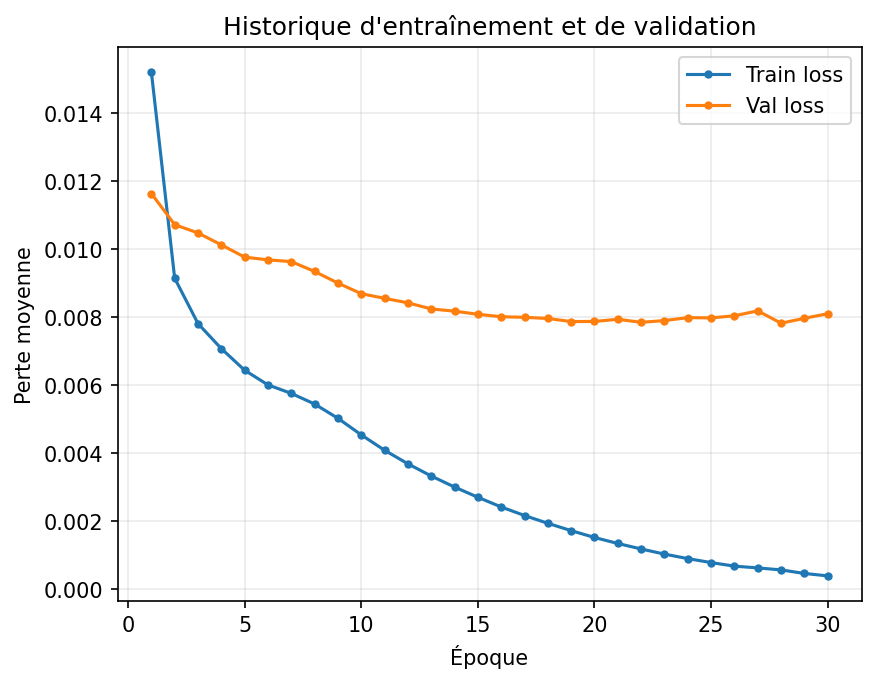

In [79]:
def show_history(history: History):
    """
    Affiche l'historique d'entra√Ænement du mod√®le dans un graphique

    Args :
        history : Objet contenant les pertes d'entra√Ænement et de
        validation de chaque √©tape d'entra√Ænement
    """
    # TODO
    fig,ax=plt.subplots(dpi=150)
    ax.plot(list(range(1,len(history.t_loss)+1)),\
            history.t_loss, label='Train loss',marker='.')
    ax.plot(list(range(1,len(history.v_loss)+1)),\
            history.v_loss, label='Val loss',marker='.')
    ax.set(xlabel='√âpoque', ylabel='Perte moyenne', \
           title = "Historique d'entra√Ænement et de validation")
    ax.legend()
    ax.grid(lw=0.2)
    # END TODO

show_history(history)

#### 8.2 Est-ce que le mod√®le semble √™tre en sur-apprentissage ? Pourquoi ? Que feriez-vous pour r√©soudre ce probl√®me ? (2 points)

#### 8.3 Lors de l'entra√Ænement, un mod√®le a √©t√© sauvegard√© √† chaque 10 √©poques. En vous basant sur le graphique de la fonction de perte durant l'entra√Ænement, choisissez la sauvegarde du mod√®le qui n'est pas en sur-apprentissage et chargez le pour l'√©valuation √† l'aide de la fonction `load` de la classe `Trainer`. Chargez √©galement le dernier mod√®le sauvegard√© pour comparer les r√©sultats. (1 point)

Nous d√©noterons le mod√®le arr√™t√© avant le sur-apprentissage comme √©tant : `stopped_model`

Nous d√©noterons le dernier mod√®le sauvegard√© comme √©tant : `last_model`

In [80]:
# TODO

# Mettez vos deux mod√®les entra√Æn√©s dans ces variables pour la suite
stopped_model = Trainer.load(config, 'model_20.pt')
last_model = Trainer.load(config, 'model_30.pt')
# END TODO

C:\Users\XueweiLi\AppData\Local\Temp\ipykernel_4724\76416251.py:185: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


### 9. √âvaluation (20 points)

#### 9.1 G√©n√©ration (10 points)
Maintenant que le mod√®le est entra√Æn√©, nous pouvons tester ses g√©n√©rations. Compl√©tez la fonction `generate` qui g√©n√®re, pour un lot de donn√©es, les pr√©dictions d'un mod√®le sur les concepts cl√©s de la phrase donn√©e en param√®tre.

In [81]:
def generate(model: Transformer, encoder_in: torch.tensor, bos_token_id: int, eos_token_id: int, max_length=MAX_LENGTH):
    """
    G√©n√®re les pr√©dictions d'un mod√®le pour des phrases donn√©es en param√®tre. Pour cela, vous devez
    initialiser un tenseur X contenant les jetons de d√©but de phrase (bos_token_id). Ensuite, ce
    tenseur sera pass√© comme entr√©e au d√©codeur avec `encoder_in` comme entr√©e √† l'encodeur. Le mod√®le
    g√©n√®rera un jeton en sortie qui sera le jeton le plus probable √©tant donn√© le jeton de d√©but de
    phrase et la s√©quence pass√©e dans l'encodeur. Ce jeton devra √™tre concat√©n√© au tenseur initial X
    pour former une s√©quence de deux jetons. Cette nouvelle s√©quence est ensuite r√©envoy√©e au d√©codeur.
    Un jeton en sortie sera g√©n√©r√© correspondant au jeton le plus probable √©tant donn√© la s√©quence de
    deux jetons et l'entr√©e de l'encodeur. Le nouveau jeton est concat√©n√© au tenseur X et l'op√©ration
    est r√©p√©t√©e jusqu'√† ce que le d√©codeur g√©n√®re le jeton de fin de phrase.

    Args :
        model : Mod√®le effectuant les pr√©dictions

        inputs : Tenseur contenant les phrases d'entr√©es sous forme d'indices de jetons

        bos_token_id : Jeton d'entr√©e du tokenizer utilis√© pour initialiser le tenseur de g√©n√©ration

        eos_token_id : Jeton de fin du tokenizer utilis√© pour d√©tecter la fin d'une s√©quence

        max_length : Nombre maximal de jetons qui doivent √™tre g√©n√©r√©s par le mod√®le

    Returns :
    G√©n√©ration du mod√®le de chacune des phrases en entr√©e
    """
    # TODO

    batch_size = encoder_in.shape[0]
    X = torch.full((batch_size, 1), bos_token_id, dtype=torch.long)  # (batch_size, 1)
    
    for _ in range(max_length):
        
        with torch.no_grad():
            # On r√©cup√®re la sortie du mod√®le
            outputs = model(encoder_in, X) 
        
        # On r√©cup√®re le logit des mots du vocaibulaire
        logits = outputs[:, -1, :]  # (batch_size, vocab_size)

        # On choisit le jeton √† g√©n√©rer max(logit)
        next_token = torch.argmax(logits, dim=-1, keepdim=True)   # (batch_size, 1)

        # On arr√™te la g√©n√©ration si on rencontre le jeton de fin
        if (next_token.squeeze() == eos_token_id).all():
            break
    
        # On concat√®ne le jeton g√©n√©r√© et la s√©quence
        X = torch.cat((X, next_token), dim=1)  # (1, seq_length)
         
    return X
    # END TODO

In [82]:
def get_predictions(model, tokenizer):

    bos_token_id = tokenizer("")['input_ids'][0]
    eos_token_id = tokenizer("")['input_ids'][1]
    
    sentences = []
    predictions = []
    ground_truth = []
    for test_data in test_loader:

        inputs = test_data['encoder_in']
        result = generate(model, inputs, bos_token_id, eos_token_id)

        sentences.extend(tokenizer.batch_decode(test_data['encoder_in'], skip_special_tokens=True))
        ground_truth.extend(tokenizer.batch_decode(test_data['decoder_out'], skip_special_tokens=True))
        predictions.extend(tokenizer.batch_decode(result, skip_special_tokens=True))

    return sentences, ground_truth, predictions

sentences_stopped, ground_truth_stopped, predictions_stopped = get_predictions(stopped_model, tokenizer)
sentences_last, ground_truth_last, predictions_last = get_predictions(last_model, tokenizer)

In [83]:
predictions_stopped = pd.DataFrame({'sentences': sentences_stopped, 'ground_truth': ground_truth_stopped, 'predictions': predictions_stopped})
predictions_last = pd.DataFrame({'sentences': sentences_last, 'ground_truth': ground_truth_last, 'predictions': predictions_last})

In [84]:
predictions_stopped.head(25)

sentences  \
0   two elephants standing next to each other in t...   
1   A big elephant that is standing there quietly ...   
2                        love the color of this dress   
3                 i just love the colors in her dress   
4           love the colors and print on this dress .   
5                      harvesting wheat in the fields   
6                   wheat ready to harvest in a field   
7               a farmer harvests wheat at the fields   
8                     a bee pollinating a pink flower   
9                 bee pollinate the flowers in yellow   
10            this honey bee is pollinating flowers .   
11           a group of students celebrate graduation   
12    students celebrate on the lawn after graduation   
13  happy female students celebrating their gradua...   
14           a bathroom with a brown wall and counter   
15  A well lit bathroom with white walls and beige...   
16              A giraffe is standing inside of a pen   
17         these are three giraffes standing in a pen   
18  Four giraffe standing next to each other in a ...   
19           A dog that is laying down under a desk .   
20   A dog lays on a desk with a laptop and monitor .   
21   A black dog laying on desk below a white mouse .   
22        A jet airplane parked at the airport gate .   
23  A parked airplane behind many tall security ga...   
24  A pair of airplanes parked on the tarmac near ...   

                                    ground_truth  \
0             [ ' elephant ' ' pen ' ' stand ' ]   
1             [ ' elephant ' ' pen ' ' stand ' ]   
2               [ ' color ' ' dress ' ' love ' ]   
3               [ ' color ' ' dress ' ' love ' ]   
4               [ ' color ' ' dress ' ' love ' ]   
5            [ ' field ' ' harvest ' ' wheat ' ]   
6            [ ' field ' ' harvest ' ' wheat ' ]   
7            [ ' field ' ' harvest ' ' wheat ' ]   
8           [ ' bee ' ' flower ' ' pollinate ' ]   
9           [ ' bee ' ' flower ' ' pollinate ' ]   
10          [ ' bee ' ' flower ' ' pollinate ' ]   
11  [ ' celebrate ' ' graduation ' ' student ' ]   
12  [ ' celebrate ' ' graduation ' ' student ' ]   
13  [ ' celebrate ' ' graduation ' ' student ' ]   
14         [ ' bathroom ' ' counter ' ' wall ' ]   
15         [ ' bathroom ' ' counter ' ' wall ' ]   
16             [ ' giraffe ' ' pen ' ' stand ' ]   
17             [ ' giraffe ' ' pen ' ' stand ' ]   
18             [ ' giraffe ' ' pen ' ' stand ' ]   
19                  [ ' desk ' ' dog ' ' lay ' ]   
20                  [ ' desk ' ' dog ' ' lay ' ]   
21                  [ ' desk ' ' dog ' ' lay ' ]   
22            [ ' airplane ' ' gate ' ' park ' ]   
23            [ ' airplane ' ' gate ' ' park ' ]   
24            [ ' airplane ' ' gate ' ' park ' ]   

                                predictions  
0      [ ' elephant ' ' stand ' ' stand ' ]  
1      [ ' elephant ' ' stand ' ' stand ' ]  
2         [ ' color ' ' color ' ' color ' ]  
3            [ ' day ' ' color ' ' work ' ]  
4      [ ' bathroom ' ' color ' ' water ' ]  
5          [ ' field ' ' field ' ' tree ' ]  
6          [ ' field ' ' field ' ' tree ' ]  
7         [ ' farmer ' ' field ' ' plow ' ]  
8          [ ' bee ' ' flower ' ' plane ' ]  
9         [ ' bee ' ' flower ' ' flower ' ]  
10       [ ' flower ' ' flower ' ' time ' ]  
11  [ ' student ' ' student ' ' teacher ' ]  
12    [ ' student ' ' student ' ' study ' ]  
13     [ ' student ' ' student ' ' work ' ]  
14    [ ' bathroom ' ' counter ' ' wall ' ]  
15       [ ' bathroom ' ' tile ' ' wall ' ]  
16      [ ' giraffe ' ' stand ' ' stand ' ]  
17      [ ' giraffe ' ' stand ' ' stand ' ]  
18      [ ' giraffe ' ' stand ' ' stand ' ]  
19              [ ' dog ' ' lay ' ' lay ' ]  
20          [ ' desk ' ' laptop ' ' sky ' ]  
21              [ ' dog ' ' lay ' ' dog ' ]  
22    [ ' airplane ' ' airport ' ' park ' ]  
23       [ ' airplane ' ' park ' ' park ' ]  
24       [ ' park ' ' tarmac ' ' tarmac ' ]

In [85]:
predictions_last.head(25)

sentences  \
0   two elephants standing next to each other in t...   
1   A big elephant that is standing there quietly ...   
2                        love the color of this dress   
3                 i just love the colors in her dress   
4           love the colors and print on this dress .   
5                      harvesting wheat in the fields   
6                   wheat ready to harvest in a field   
7               a farmer harvests wheat at the fields   
8                     a bee pollinating a pink flower   
9                 bee pollinate the flowers in yellow   
10            this honey bee is pollinating flowers .   
11           a group of students celebrate graduation   
12    students celebrate on the lawn after graduation   
13  happy female students celebrating their gradua...   
14           a bathroom with a brown wall and counter   
15  A well lit bathroom with white walls and beige...   
16              A giraffe is standing inside of a pen   
17         these are three giraffes standing in a pen   
18  Four giraffe standing next to each other in a ...   
19           A dog that is laying down under a desk .   
20   A dog lays on a desk with a laptop and monitor .   
21   A black dog laying on desk below a white mouse .   
22        A jet airplane parked at the airport gate .   
23  A parked airplane behind many tall security ga...   
24  A pair of airplanes parked on the tarmac near ...   

                                    ground_truth  \
0             [ ' elephant ' ' pen ' ' stand ' ]   
1             [ ' elephant ' ' pen ' ' stand ' ]   
2               [ ' color ' ' dress ' ' love ' ]   
3               [ ' color ' ' dress ' ' love ' ]   
4               [ ' color ' ' dress ' ' love ' ]   
5            [ ' field ' ' harvest ' ' wheat ' ]   
6            [ ' field ' ' harvest ' ' wheat ' ]   
7            [ ' field ' ' harvest ' ' wheat ' ]   
8           [ ' bee ' ' flower ' ' pollinate ' ]   
9           [ ' bee ' ' flower ' ' pollinate ' ]   
10          [ ' bee ' ' flower ' ' pollinate ' ]   
11  [ ' celebrate ' ' graduation ' ' student ' ]   
12  [ ' celebrate ' ' graduation ' ' student ' ]   
13  [ ' celebrate ' ' graduation ' ' student ' ]   
14         [ ' bathroom ' ' counter ' ' wall ' ]   
15         [ ' bathroom ' ' counter ' ' wall ' ]   
16             [ ' giraffe ' ' pen ' ' stand ' ]   
17             [ ' giraffe ' ' pen ' ' stand ' ]   
18             [ ' giraffe ' ' pen ' ' stand ' ]   
19                  [ ' desk ' ' dog ' ' lay ' ]   
20                  [ ' desk ' ' dog ' ' lay ' ]   
21                  [ ' desk ' ' dog ' ' lay ' ]   
22            [ ' airplane ' ' gate ' ' park ' ]   
23            [ ' airplane ' ' gate ' ' park ' ]   
24            [ ' airplane ' ' gate ' ' park ' ]   

                                     predictions  
0     [ ' elephant ' ' stand ' ' stand ' ] ' ] '  
1     [ ' elephant ' ' stand ' ' stand ' ] ' ] '  
2        [ ' color ' ' color ' ' color ' ] ' ] '  
3          [ ' color ' ' color ' ' win ' ] ' ] '  
4     [ ' color ' ' color ' ' umbrella ' ] ' ] '  
5         [ ' field ' ' grow ' ' wheat ' ] ' ] '  
6         [ ' field ' ' grow ' ' wheat ' ] ' ] '  
7     [ ' farmer ' ' field ' ' harvest ' ] ' ] '  
8         [ ' bee ' ' flower ' ' plane ' ] ' ] '  
9         [ ' flower ' ' land ' ' park ' ] ' ] '  
10       [ ' bee ' ' flower ' ' nectar ' ] ' ] '  
11    [ ' school ' ' student ' ' study ' ] ' ] '  
12     [ ' student ' ' study ' ' table ' ] ' ] '  
13   [ ' student ' ' study ' ' student ' ] ' ] '  
14   [ ' bathroom ' ' counter ' ' wall ' ] ' ] '  
15   [ ' bathroom ' ' feature ' ' wall ' ] ' ] '  
16           [ ' pen ' ' pen ' ' stand ' ] ' ] '  
17         [ ' pen ' ' stand ' ' stand ' ] ' ] '  
18     [ ' giraffe ' ' stand ' ' stand ' ] ' ] '  
19            [ ' desk ' ' dog ' ' lay ' ] ' ] '  
20       [ ' desk ' ' laptop ' ' sleep ' ] ' ] '  
21             [ ' dog ' ' lay ' ' rug ' ] ' ] '  
22   [ ' airplane ' ' airport ' ' p

#### 9.2 √âvaluation naive de la g√©n√©ration (1 point)
Nous allons d'abord mesurer l'efficacit√© de notre mod√®le pour extraire les concepts √† l'aide d'une m√©trique de correspondance exacte (exact match). Pour cela, nous allons mesurer le nombre de g√©n√©rations (`predictions`) qui sont identiques √† celles qui sont attendues dans l'ensemble de r√©f√©rence (`ground truth`) et diviser le tout par le nombre totaux d'√©l√©ments dans l'ensemble de r√©f√©rence. Ainsi, la m√©trique EM (exact match) √©quivaut √† :

$$\text{EM} = \frac{\text{Nombre d'√©l√©ments identiques entre l'ensemble g√©n√©r√© et l'ensemble de r√©f√©rence}}{\text{Nombre d'√©l√©ments dans l'ensemble de r√©f√©rence}}$$

In [86]:
def compute_em_score(data):
    """
    √âvalue la m√©trique EM du mod√®le en utilisant la m√©trique BLEU
    Args :
        - data : DataFrame contenant les colonnes predictions et ground_truth

    Returns :
    La m√©trique EM du mod√®le en pourcentage
    """
    # TODO
    exact_match_list = np.zeros(data['predictions'].shape[0])
    for idx, row in data.iterrows():
        exact_matche = 0
        nbr_elements = len(row['ground_truth'].split())
        mot_prediction = re.findall(r'[a-zA-Z]+', row['predictions'])
        mot_ground_truth = re.findall(r'[a-zA-Z]+', row['ground_truth'])
        
        # On compare les mots position par position pour calculer exact_match
        for p_word, gt_word in zip(mot_prediction, mot_ground_truth):
            if p_word == gt_word:
                exact_matche += 1
        exact_match_list[idx] = exact_matche / nbr_elements
    return np.mean(exact_match_list) * 100
    # END TODO

print(f"La m√©trique EM du mod√®le arr√™t√© selon la fonction de perte est {compute_em_score(predictions_stopped):.2f} %")
print(f"La m√©trique EM du dernier mod√®le est {compute_em_score(predictions_last):.2f} %")

La m√©trique EM du mod√®le arr√™t√© selon la fonction de perte est 11.17 %
La m√©trique EM du dernier mod√®le est 12.56 %


#### 9.3 Quels probl√®mes voyez-vous avec cette mani√®re de calculer la performance du mod√®le ? (1 point)

#### 9.4 M√©trique BLEU (4 points)
Pour pallier √† ce probl√®me, la m√©trique BLEU sera utilis√©e puisqu'elle est bas√©e sur le nombre de n-gramme qui sont pr√©sents dans les pr√©dictions et les s√©quences voulues. La formule est donn√©e ci-dessous :
$$BLEU = BP * exp \Big( \sum_{n=1}^{N} w_n \log p_n \Big)$$

Consid√©rant que $r$ est la phrase de r√©f√©rence (voulue) et $c$ la phrase g√©n√©r√©e (candidate), $p_n$ est la pr√©cision modifi√©e pour le n-gramme (correspondant au ratio de la fr√©quence maximum du n-gramme dans la phrase de r√©f√©rence par la fr√©quence du n-gramme): 
$$p_n = \frac{\sum_{\text{n-gramme} \in c} \min\Big( \max_{r} \text{Count$_r$(n-gramme)}, \text{Count$_c$(n-gramme)} \Big)}{\sum_{\text{n-gramme} \in c} \text{Count$_c$(n-gramme)}}$$

Notez que le $\max_{r}$ est pr√©sent ici car BLEU accepte plusieurs phrases de r√©f√©rence pour une m√™me phrase g√©n√©r√©e. Cependant, dans notre cas, il y a seulement une seule phrase de r√©f√©rence.

Posons ensuite $|r|$ comme le nombre de mots dans la phrase cible et $|c|$ comme le nombre de mots dans la phrase pr√©dite. Si $c>r$, alors BP vaut 1. Sinon $$BP = exp(1 - \frac{|r|}{|c|})$$

Les valeurs des poids $w_n$ est ce qui donne les diff√©rentes variations de la m√©trique BLEU. Dans notre cas, la m√©trique BLEU-1 sera utilis√©e. La valeur maximale du score BLEU est 1 et la valeur minimale est 0.

Vous pouvez utiliser la fonction `sentence_bleu` de `nltk` pour calculer votre score BLEU. N'oubliez pas d'enlever les apostrophes et les crochets des g√©n√©rations avant votre calcul.

In [87]:
from nltk.translate.bleu_score import sentence_bleu

def compute_bleu(predictions):
    """
    √âvalue la pr√©cision du mod√®le en utilisant la m√©trique BLEU
    Args :
        - data : DataFrame contenant les colonnes predictions et ground_truth

    Returns :
        La moyenne du score BLEU
    """
    weights = (1, 0, 0, 0) # Use Bleu-1
    # TODO
    blue_scores = np.zeros(predictions.shape[0])
    
    for idx, row in predictions.iterrows():
        # On filtre les lettres (pour enlever les apostrophes et les crochets)
        prediction = re.findall(r'[a-zA-Z]+', row['predictions'])
        ground_truth = re.findall(r'[a-zA-Z]+', row['ground_truth'])
        
        blue_scores[idx] = sentence_bleu([ground_truth], prediction, weights)
       
    return np.mean(blue_scores)
    # END TODO

print(f"Le score BLEU du mod√®le arr√™t√© selon la fonction de perte est {compute_bleu(predictions_stopped):.2f}")
print(f"Le score BLEU du dernier mod√®le est {compute_bleu(predictions_last):.2f}.")

Le score BLEU du mod√®le arr√™t√© selon la fonction de perte est 0.51
Le score BLEU du dernier mod√®le est 0.59.


C:\Users\XueweiLi\AppData\Roaming\Python\Python312\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\XueweiLi\AppData\Roaming\Python\Python312\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\XueweiLi\AppData\Roaming\Python\Python312\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Con

#### 9.5 Quel est l'avantage d'utiliser la m√©trique BLEU par rapport √† la m√©trique EM bas√©e sur la comparaison de cha√Æne de caract√®res ? (2 points)

#### 9.6 Que remarquez-vous par rapport aux performances du mod√®le arr√™t√© avant le sur-apprentissage selon la fonction de perte versus celles du dernier mod√®le ? Quelles sont les raisons qui peuvent expliquer cela ? (2 points)

### 10. Exploration (4 points)

#### 10.1 Explorez les g√©n√©rations actuelles de votre mod√®le et ressortez 2 probl√®mes que le mod√®le a lors de la g√©n√©ration qui font diminuer son score BLEU. (2 points)

In [88]:
predictions_stopped

sentences  \
0    two elephants standing next to each other in t...   
1    A big elephant that is standing there quietly ...   
2                         love the color of this dress   
3                  i just love the colors in her dress   
4            love the colors and print on this dress .   
..                                                 ...   
495         a hiking trail leading off into the forest   
496  trail leading into the forest with moss on bot...   
497                    comedian arrives at awards held   
498                comedian and comedian holds award .   
499                pears growing up a wall in a garden   

                            ground_truth  \
0     [ ' elephant ' ' pen ' ' stand ' ]   
1     [ ' elephant ' ' pen ' ' stand ' ]   
2       [ ' color ' ' dress ' ' love ' ]   
3       [ ' color ' ' dress ' ' love ' ]   
4       [ ' color ' ' dress ' ' love ' ]   
..                                   ...   
495    [ ' forest ' ' lead ' ' trail ' ]   
496    [ ' forest ' ' lead ' ' trail ' ]   
497  [ ' award ' ' comedian ' ' hold ' ]   
498  [ ' award ' ' comedian ' ' hold ' ]   
499     [ ' garden ' ' grow ' ' wall ' ]   

                                   predictions  
0         [ ' elephant ' ' stand ' ' stand ' ]  
1         [ ' elephant ' ' stand ' ' stand ' ]  
2            [ ' color ' ' color ' ' color ' ]  
3               [ ' day ' ' color ' ' work ' ]  
4         [ ' bathroom ' ' color ' ' water ' ]  
..                                         ...  
495  [ ' forest ' ' forest ' ' trail ' ] ' ] '  
496   [ ' forest ' ' trail ' ' trail ' ] ' ] '  
497       [ ' cloud ' ' hold ' ' win ' ] ' ] '  
498      [ ' bee ' ' flower ' ' wall ' ] ' ] '  
499       [ ' grow ' ' grow ' ' wall ' ] ' ] '  

[500 rows x 3 columns]

In [89]:
predictions_last

sentences  \
0    two elephants standing next to each other in t...   
1    A big elephant that is standing there quietly ...   
2                         love the color of this dress   
3                  i just love the colors in her dress   
4            love the colors and print on this dress .   
..                                                 ...   
495         a hiking trail leading off into the forest   
496  trail leading into the forest with moss on bot...   
497                    comedian arrives at awards held   
498                comedian and comedian holds award .   
499                pears growing up a wall in a garden   

                            ground_truth  \
0     [ ' elephant ' ' pen ' ' stand ' ]   
1     [ ' elephant ' ' pen ' ' stand ' ]   
2       [ ' color ' ' dress ' ' love ' ]   
3       [ ' color ' ' dress ' ' love ' ]   
4       [ ' color ' ' dress ' ' love ' ]   
..                                   ...   
495    [ ' forest ' ' lead ' ' trail ' ]   
496    [ ' forest ' ' lead ' ' trail ' ]   
497  [ ' award ' ' comedian ' ' hold ' ]   
498  [ ' award ' ' comedian ' ' hold ' ]   
499     [ ' garden ' ' grow ' ' wall ' ]   

                                    predictions  
0    [ ' elephant ' ' stand ' ' stand ' ] ' ] '  
1    [ ' elephant ' ' stand ' ' stand ' ] ' ] '  
2       [ ' color ' ' color ' ' color ' ] ' ] '  
3         [ ' color ' ' color ' ' win ' ] ' ] '  
4    [ ' color ' ' color ' ' umbrella ' ] ' ] '  
..                                          ...  
495           [ ' forest ' ' hike ' ' trail ' ]  
496          [ ' forest ' ' trail ' ' trail ' ]  
497           [ ' arrive ' ' event ' ' hold ' ]  
498           [ ' frame ' ' ' hold ' toilet ' ]  
499              [ ' grow ' ' grow ' ' wall ' ]  

[500 rows x 3 columns]

#### 10.2 Am√©lioration des m√©triques (2 points)
L'exemple ci-dessous montre 2 g√©n√©rations de 2 mod√®les pour la phrase "A dog is eating a flower". Bien que la g√©n√©ration du mod√®le 2 soit beaucoup plus proche s√©mantiquement de la r√©f√©rence que celle du mod√®le 1, la m√©trique BLEU retourne 0.0 dans les deux cas. En effet, puisque la m√©trique ne compare que les n-grammes, la pr√©diction du mod√®le 2 est quand m√™me de 0, car aucun des mots dans la pr√©diction ne sont pr√©sents dans les concepts voulus.

In [90]:
ground_truth = "['dog' 'eat' 'flower']"

prediction_1 = "['car' 'hit' 'person']"
preds = pd.DataFrame({'predictions': [prediction_1], 'ground_truth': [ground_truth]})

print(f"Concepts voulus {ground_truth}")
print(f"Pr√©diction du mod√®le 1 : {prediction_1}")
print(f"BLEU : {compute_bleu(preds):.2f}")

prediction_2 = "['animal' 'eating' 'plant']"
preds = pd.DataFrame({'predictions': [prediction_2], 'ground_truth': [ground_truth]})

print(f"Pr√©diction du mod√®le 2 : {prediction_2}")
print(f"BLEU : {compute_bleu(preds):.2f}")

Concepts voulus ['dog' 'eat' 'flower']
Pr√©diction du mod√®le 1 : ['car' 'hit' 'person']
BLEU : 0.00
Pr√©diction du mod√®le 2 : ['animal' 'eating' 'plant']
BLEU : 0.00


Proposez (sans l'impl√©menter) une meilleure m√©trique pour √©valuer les mod√®les face √† cette t√¢che d'extraction qui donnerait un score plus √©lev√© √† la pr√©diction du mod√®le 2. 

## Livrables
Vous devez remettre votre notebook sur Moodle et Gradescope en ipynb et pdf. Pour Gradescope vous devez associer les num√©ros de questions avec vos r√©ponses dans le pdf gr√¢ce √† l'outil que fournit Gradescope.


## √âvaluation 
Votre TP sera √©valu√© selon les crit√®res suivants :
1. Ex√©cution correcte du code et obtention des sorties attendues
2. R√©ponses correctes aux questions d'analyse
3. Qualit√© du code (noms significatifs, structure, performance, gestion d‚Äôexception, etc.)
4. Commentaires clairs et informatifs